# Intensity Transformation Operations on Images
Intensity transformations are applied on images for contrast manipulation or image thresholding. These are in the spatial domain, i.e. they are performed directly on the pixels of the image at hand, as opposed to being performed on the Fourier transform of the image. The following are commonly used intensity transformations:
1. Image Negatives (Linear)
2. Log Transformations
3. Power-Law (Gamma) Transformations
4. Piecewise-Linear Transformation Functions

link https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/

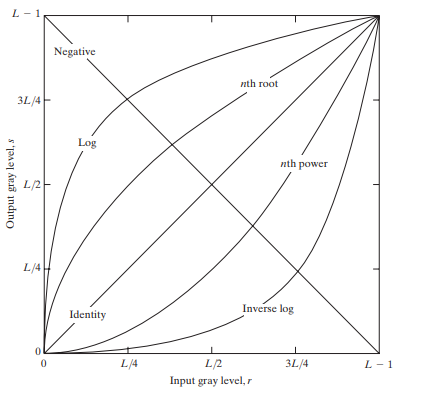

### code to apply log transformation to the image

-1

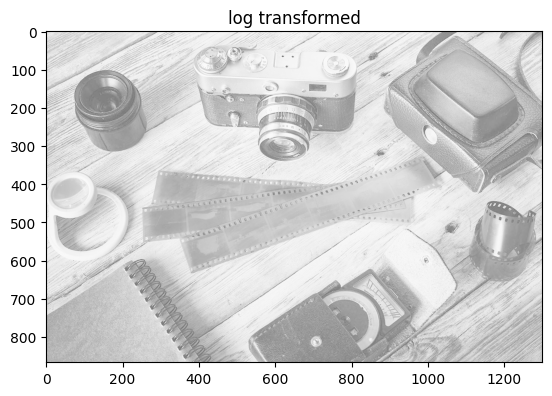

In [3]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
  
# Open the image. 
img = cv2.imread(r'image\sample.jpg') 
  
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# show the output. 
plt.title('log transformed')
plt.imshow(log_transformed)

cv2.imshow('log transformed', log_transformed) 
cv2.waitKey(0)

### Power-Law (Gamma) Transformation

In [4]:
 
import cv2 
import numpy as np 
  
# Open the image. 
img = cv2.imread(r'image\sample.jpg') 
  
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    cv2.imshow('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Piecewise-Linear Transformation Functions

In [6]:
import cv2 
import numpy as np 

# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
	if (0 <= pix and pix <= r1): 
		return (s1 / r1)*pix 
	elif (r1 < pix and pix <= r2): 
		return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
	else: 
		return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

# Open the image. 
img = cv2.imread(r'image\sample.jpg') 

# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 

# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 

# Save edited image. 
cv2.imshow('contrast stretch', contrast_stretched) 
cv2.waitKey(0)
cv2.destroyAllWindows()